<h1 align="center">IMAGES, PDF's & CSV FILES</h1>
<h2 align="left"><ins>Lesson Guide</ins></h2>

- [**WORKING WITH IMAGES**](#image)
    - [**Opening Images**](#open)
    - [**Image Information**](#info)
    - [**Cropping Images**](#crop)
    - [**Copying and Pasting Images**](#copy)
    - [**Resizing**](#resizing)
    - [**Rotating Images**](#rotate)
    - [**Transparency**](#transparency)
    - [**Filters**](#filter)
- [**WORKING WITH PDF FILES**](#pdf)
    - [**Reading PDFs**](#read_pdf)
    - [**Adding to PDFs**](#add_pdf)
    - [**Simple Example**](#example)
    - [**Formatting Pages**](#format)
- [**WORKING WITH CSV FILES**](#csv)
    - [**Reading CSV Files**](#read_csv)
    - [**Encoding**](#encoding)
    - [**Writing to CSV Files**](#write)

### Documentation   
[Python Imaging Library](https://pillow.readthedocs.io/en/stable/)


<a id='image'></a>
## WORKING WITH IMAGES

By leveraging the power of some common libraries that you can install, such as PILLOW, Python gains the ability to work with and manipulate images for simple tasks. You can install Pillow by running: `pip install Pillow`
    
**Note: When working with images in the jupyter notebook, you may get the following warning:**

    IOPub data rate exceeded.
    The notebook server will temporarily stop sending output
    to the client in order to avoid crashing it.
    To change this limit, set the config variable
    `--NotebookApp.iopub_data_rate_limit`.
    
**If you get this warning, try stopping the notebook at the command line, then restarting it with:**

    jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10
    
** At the command line. Basically this adds a "flag" that the limit should be raised during this session of jupyter notebook that you are running.**

<a id='open'></a>
### <ins>Opening Images</ins>

You can use Pillow to open image files. For a jupyter notebook, to show the file simply type the variable name holding the image. For other IDEs , the image variable will have a [.show() method.](https://stackoverflow.com/questions/28139637/how-can-i-display-an-image-using-pillow)

In [1]:
from PIL import Image, ImageFilter

In [2]:
# open the picture in the current folder
img1 = Image.open('./image_pikachu.jpg')
print(img1)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x640 at 0x1CCB8AFB548>


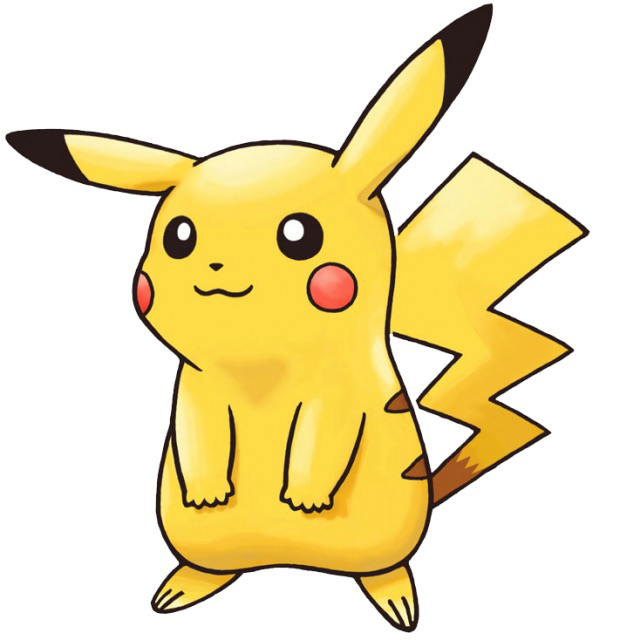

In [3]:
# running this code will open up Photos
# img.show()

img1

In [4]:
print(dir(img1))

['_Image__transformer', '__array_interface__', '__class__', '__copy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_close_exclusive_fp_after_loading', '_copy', '_crop', '_dump', '_ensure_mutable', '_exclusive_fp', '_exif', '_expand', '_get_safe_box', '_getexif', '_getmp', '_min_frame', '_new', '_open', '_repr_png_', '_seek_check', '_size', 'alpha_composite', 'app', 'applist', 'bits', 'category', 'close', 'convert', 'copy', 'crop', 'custom_mimetype', 'decoderconfig', 'decodermaxblock', 'draft', 'effect_spread', 'encoderconfig', 'encoderinfo', 'entropy', 'filename', 'filter', 'format', 'format_description', 'fp', 'frombytes', 'fromstring', 'get_for

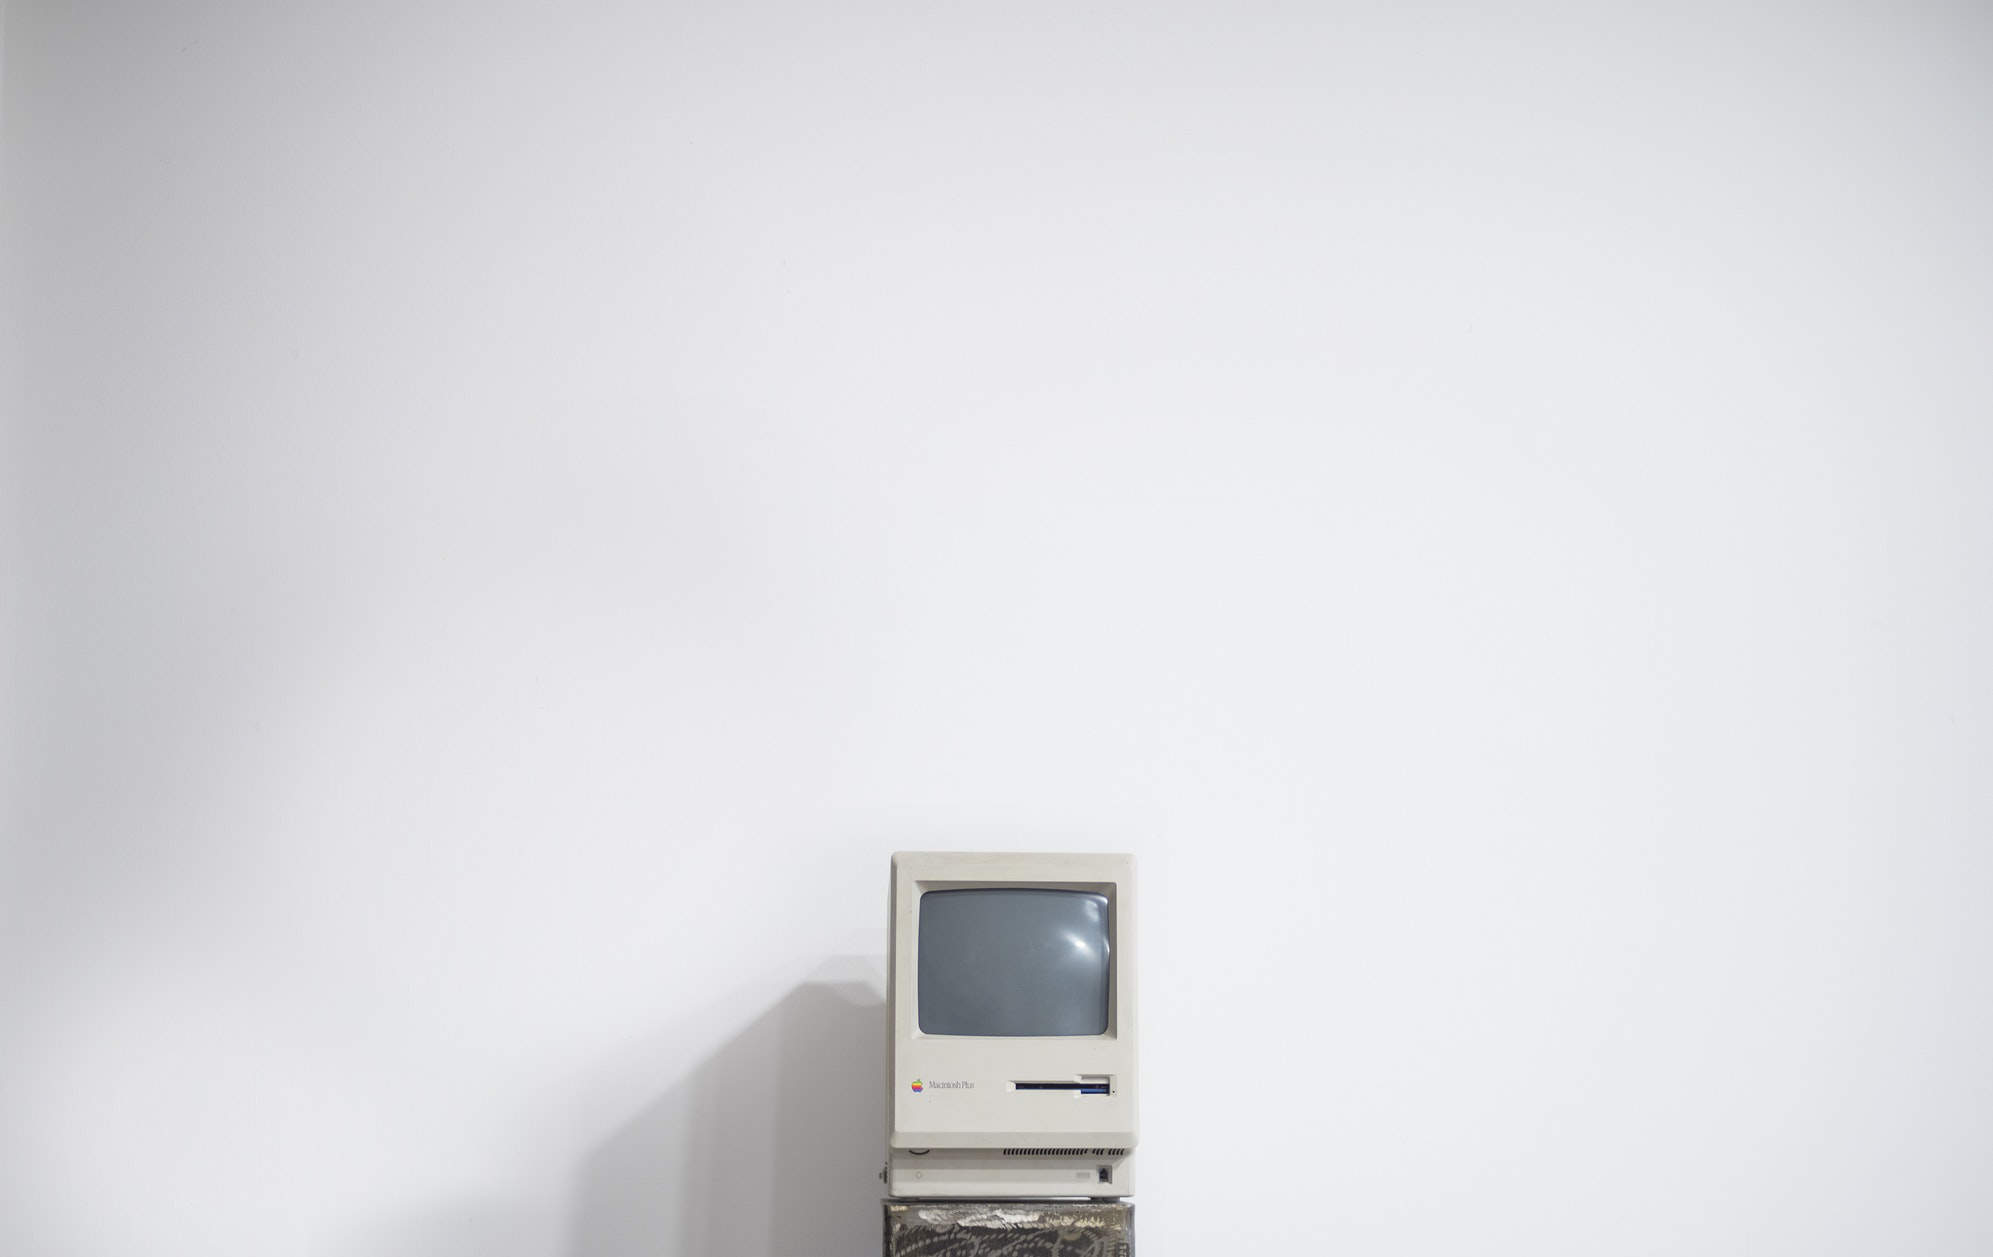

In [5]:
img2 = Image.open('image_mac.jpg')

# Only for jupyter notebook , use mac.show() for other IDEs 
img2

<a id='info'></a>
### <ins>Image Information</ins>

In [6]:
print(img1.format)
print(img1.size)
print(img1.mode)

JPEG
(640, 640)
RGB


In [7]:
print(img2.size)    # (width, height)
print(img2.filename)
print(img2.format_description)

(1993, 1257)
image_mac.jpg
JPEG (ISO 10918)


<a id='crop'></a>
### <ins>Cropping Images</ins>
To crop images (that is grab a sub section) you can use the crop() method on the image object. The crop() method returns a rectangular region from this image. The box is a 4-tuple defining the left, upper, right, and lower pixel coordinate.

Note! If you take a look at the documentation string, it says the tuple you pass in is defined as (x,y,w,h). These variables can be a bit decieving. Its not really a height or width that is being passed, but instead the end coordinates of your width and height.

All the coordinates of box (x, y, w, h) are measured from the top left corner of the image. Again, all 4 of these values are coordinates!

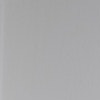

In [8]:
img2.crop((0,0,100,100))

Now let's see if we can only grab the computer itself:

In [9]:
img2.size

(1993, 1257)

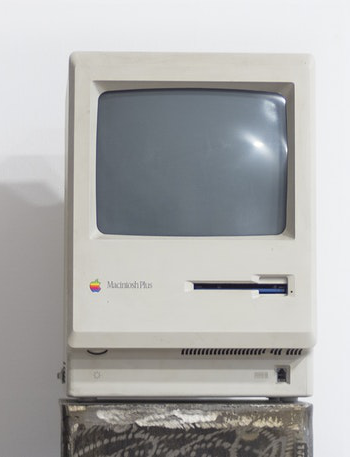

In [10]:
# Start at top corner (0,0)
halfway = 1993/2
x = halfway - 175
w = halfway + 175
y = 800
h = 1257

img2.crop((x,y,w,h))

<a id='copy'></a>
### <ins>Copying and Pasting Images</ins>
We can create copies with the copy() method and paste images on top of others with the paste() method.

In [11]:
computer = img2.crop((x,y,w,h))

In [12]:
img2.paste(im=computer,box=(0,0))

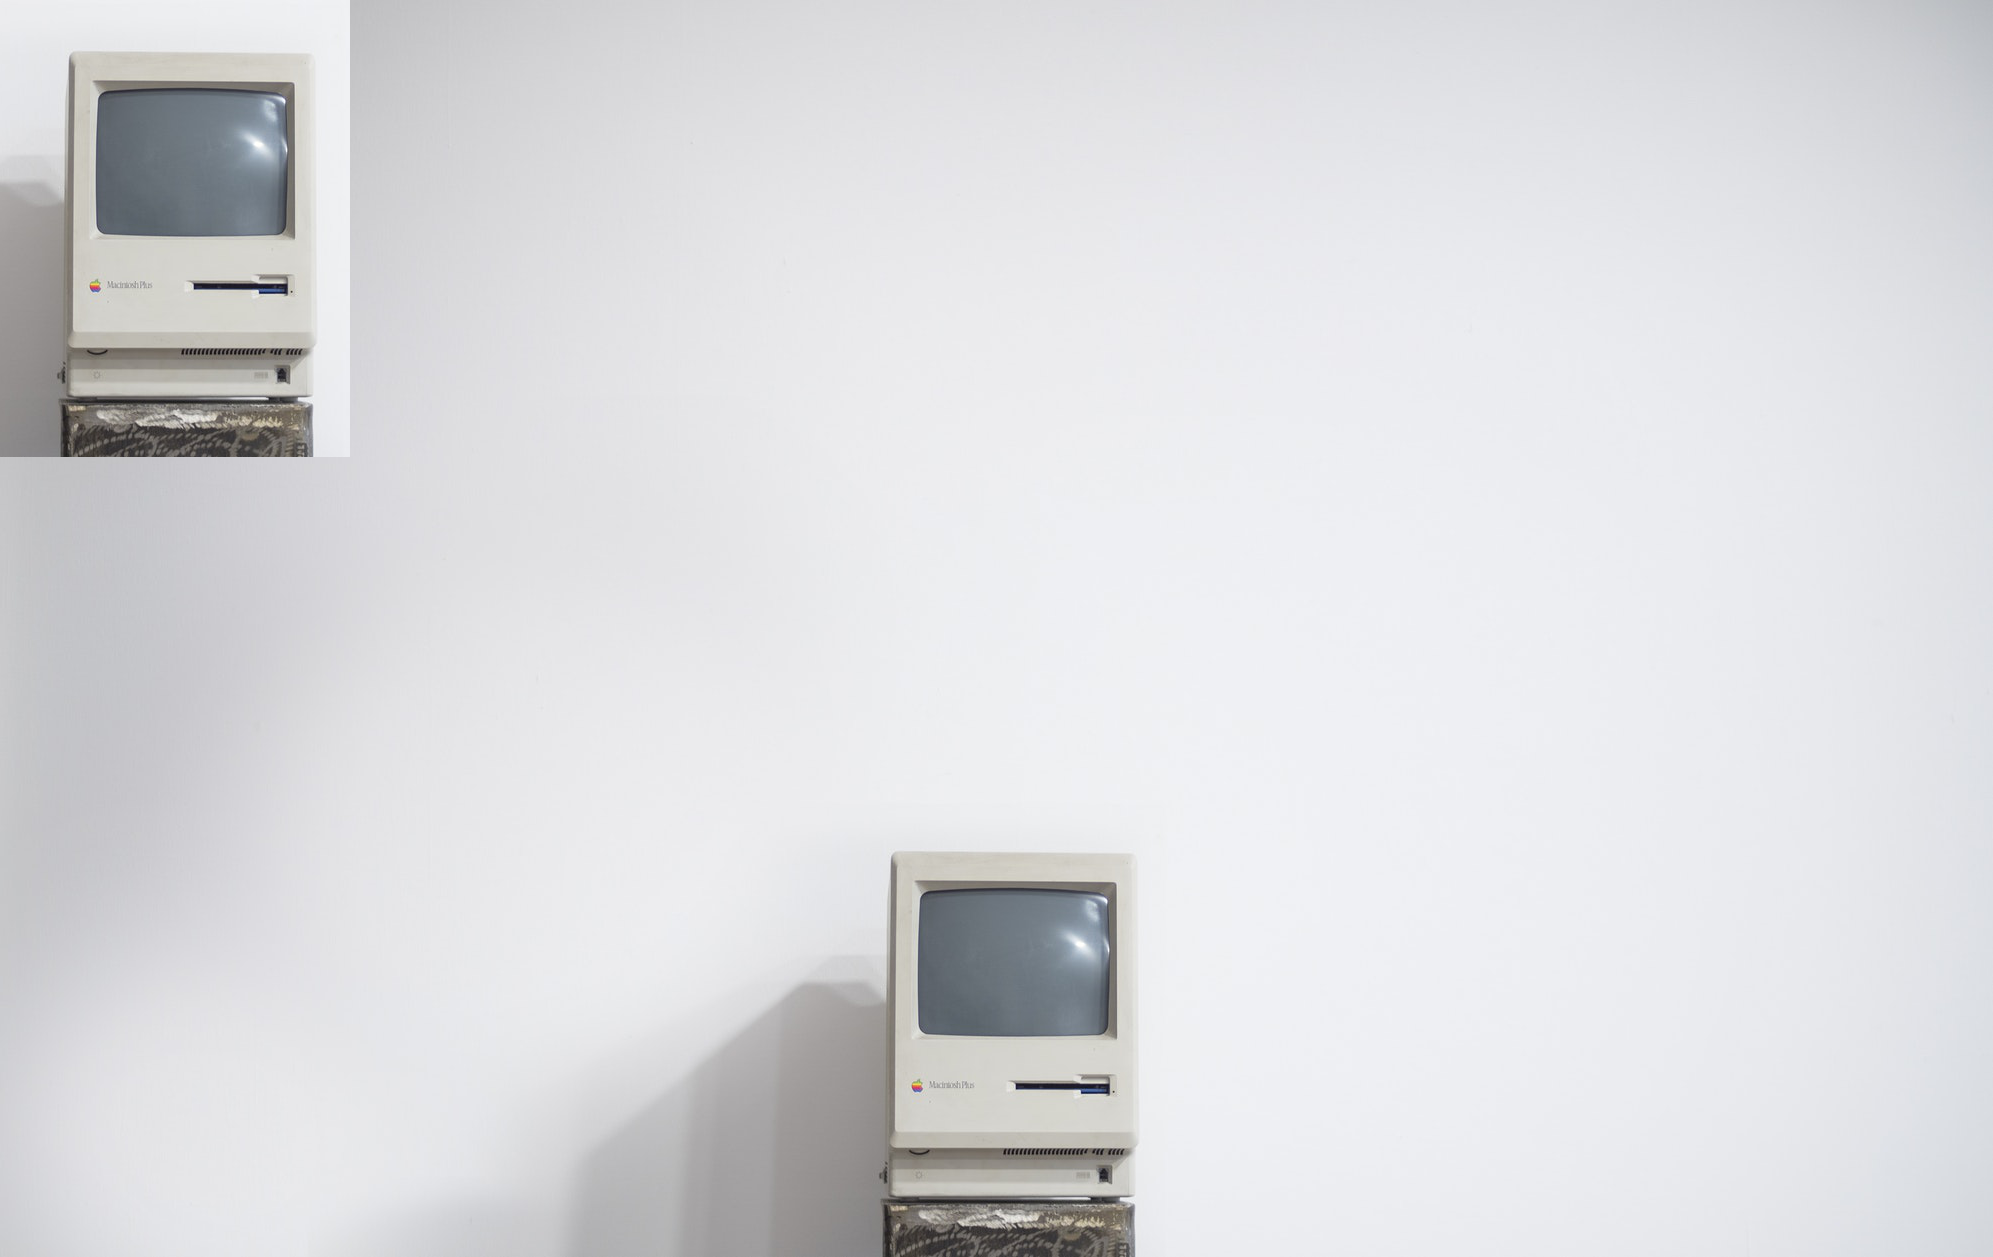

In [13]:
img2

In [14]:
img2.paste(im=computer,box=(796,0))

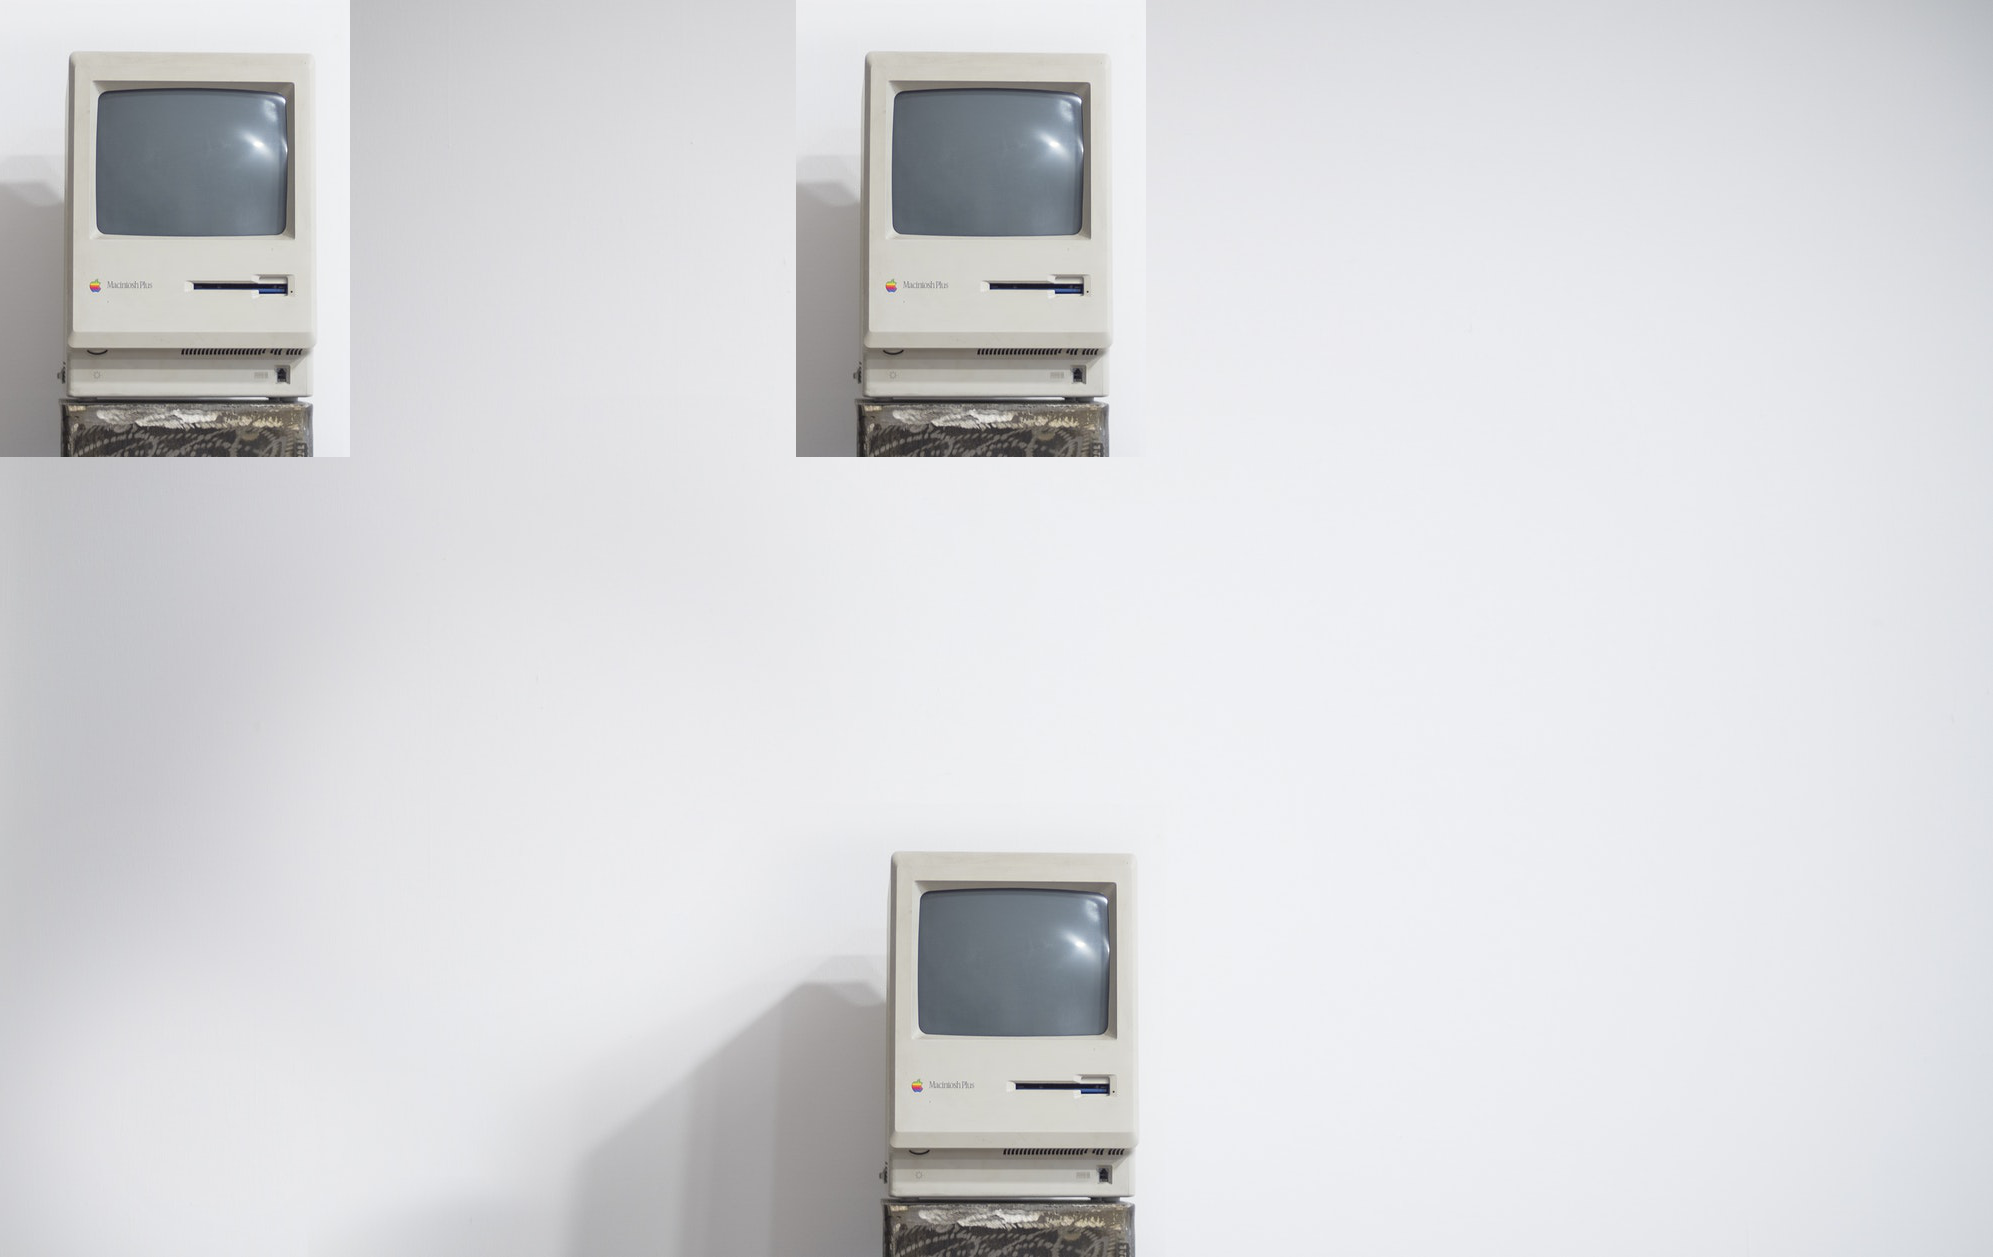

In [15]:
img2

<a id='resizing'></a>
### <ins>Resizing</ins>
You can use the resize() method to resize an image

In [16]:
img2.size

(1993, 1257)

In [17]:
h,w = img2.size

In [18]:
new_h = int(h/5)
new_w = int(w/5)

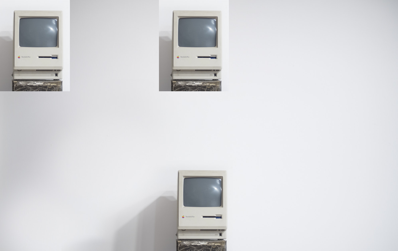

In [19]:
# Note this is not permanent change
# for permanent change, do a reassignment
# e.g. mac = mac.resize((100,100))
img2.resize((new_h,new_w))

Can also stretch and squeeze

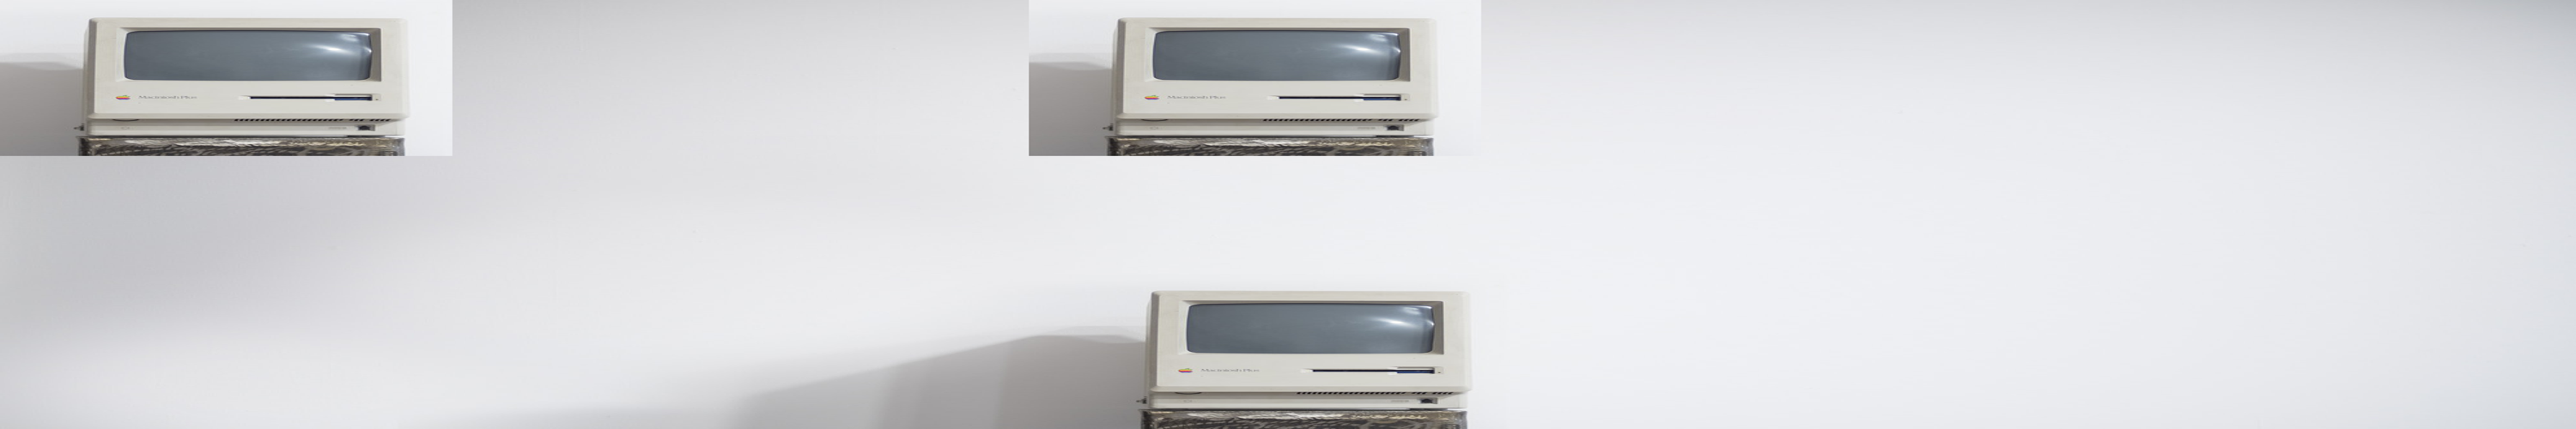

In [20]:
img2.resize((3000,500))

<a id='rotate'></a>
### <ins>Rotating Images</ins>
You can rotate images by specifying the amount of degrees to rotate on the rotate() method. The original dimensions will be kept and "filled" in with black. You can optionally pass in the expand parameter to fill the new rotated image to the old dimensions.

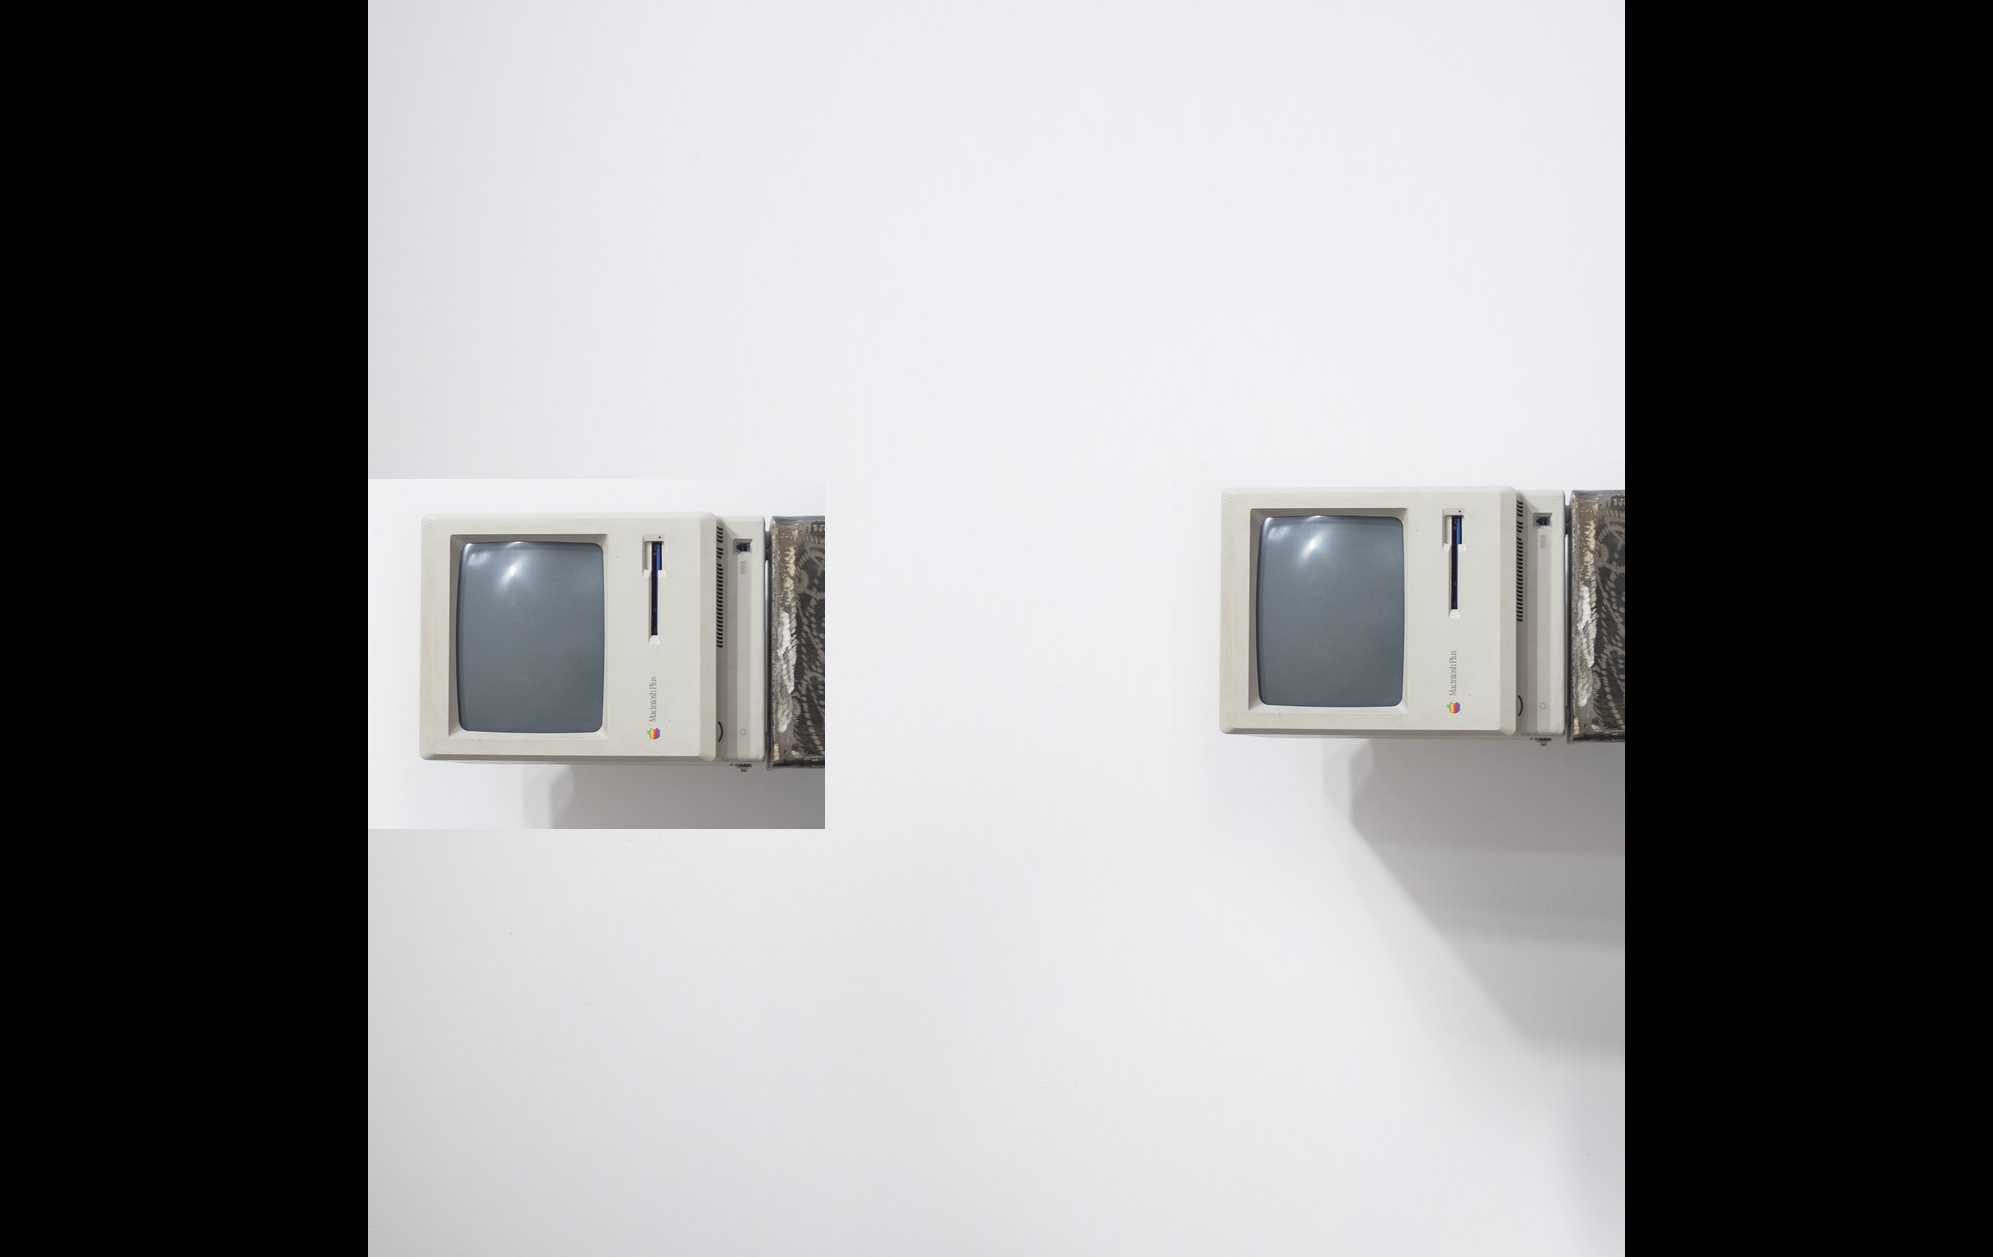

In [21]:
img2.rotate(90)

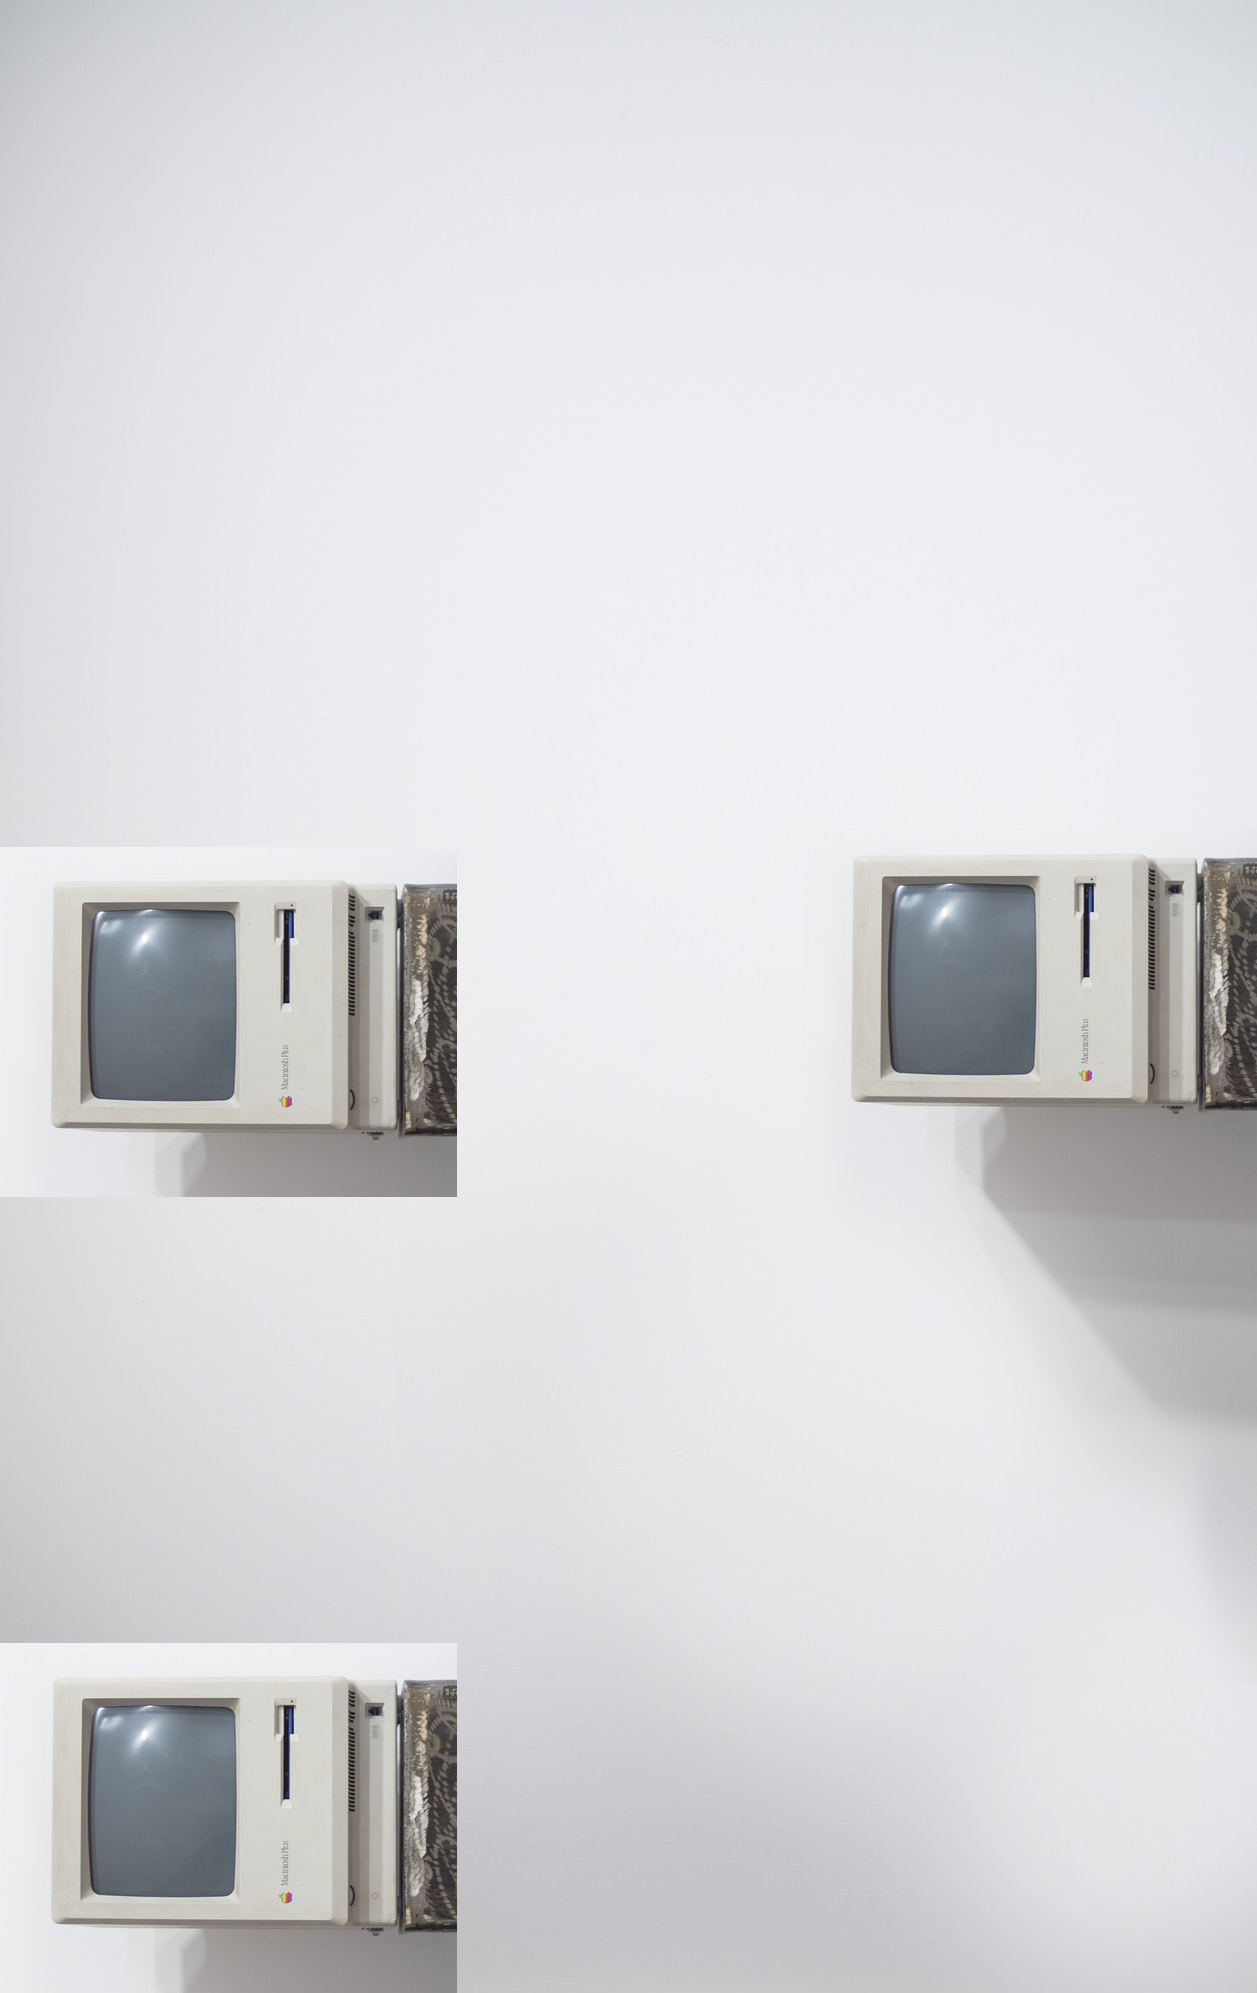

In [22]:
img2.rotate(90,expand=True)

Notice what happens when we rotate by 120.

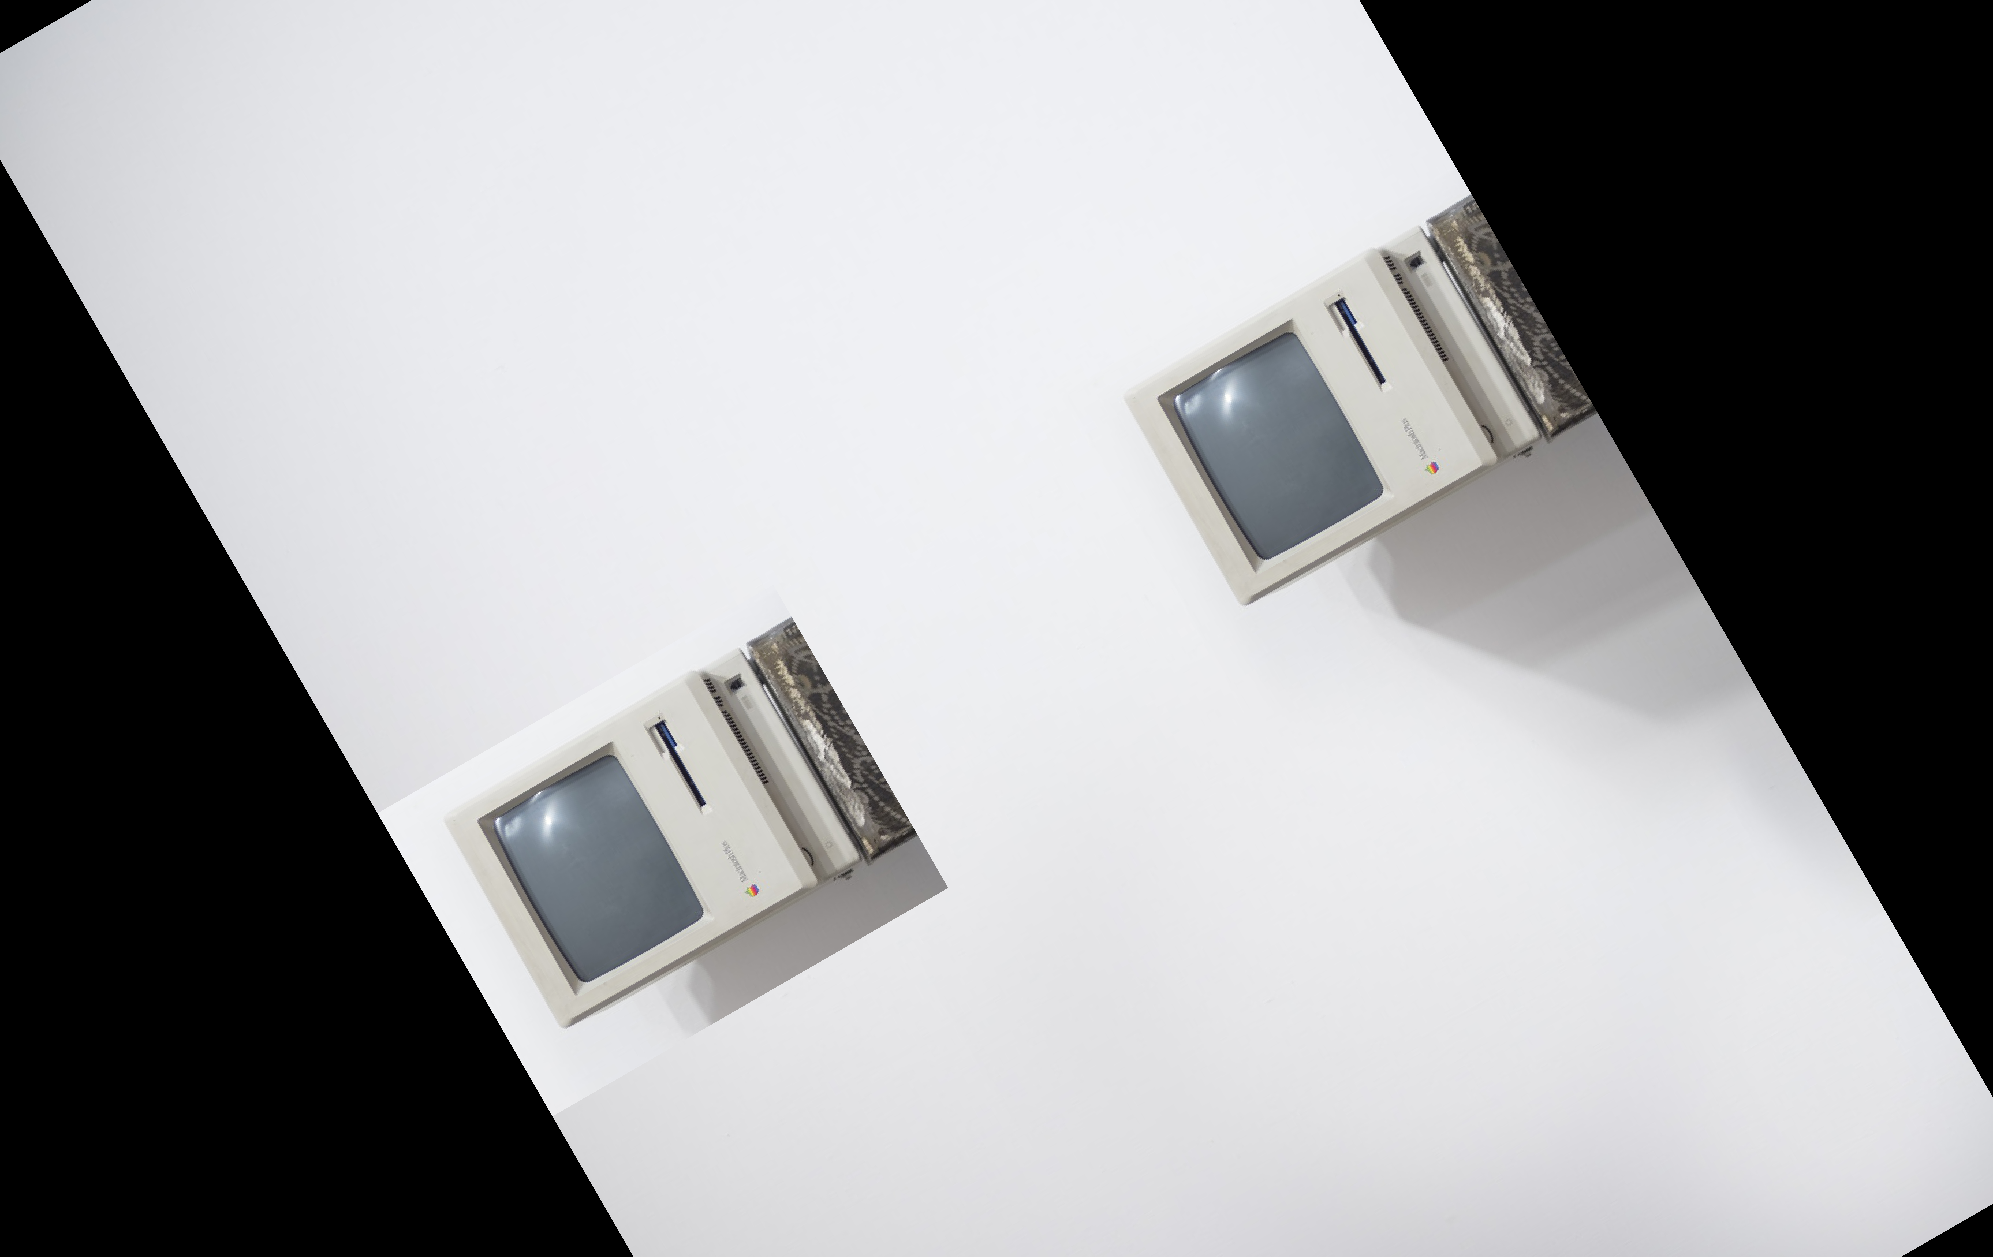

In [23]:
# The image is cut off
img2.rotate(120)

<a id='transparency'></a>
### <ins>Transparency</ins>
We can add an alpha value (RGBA stands for RED,Green,Blue, Alpha) where values can go from 0 to 255. If Alpha is 0 the image is completely transparent, if it is 255 then its completely opaque.

You can create your own color here to check for possible values: https://developer.mozilla.org/en-US/docs/Web/CSS/CSS_Colors/Color_picker_tool

We can adjust image alpha values with the putalpha() method:

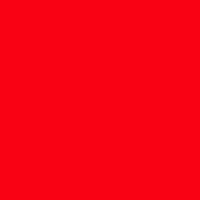

In [24]:
red = Image.open('image_red_color.jpg')
red

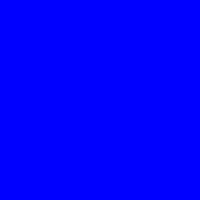

In [25]:
blue = Image.open('image_blue_color.png').convert('RGB')
blue

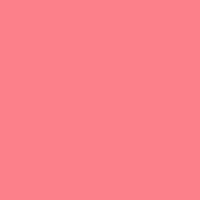

In [26]:
red.putalpha(128)
red

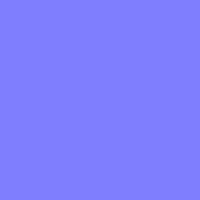

In [27]:
blue.putalpha(128)
blue

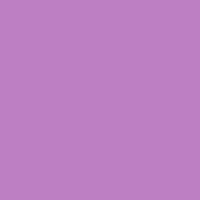

In [28]:
blue.paste(red,(0,0),mask=red)

# Get back an image that is more purple.
blue

<a id='filter'></a>
### <ins>Filters</ins>
**png** format is used here as **jpg** might produce errors with some of the methods

In [29]:
print(dir(ImageFilter))

['BLUR', 'BoxBlur', 'BuiltinFilter', 'CONTOUR', 'Color3DLUT', 'DETAIL', 'EDGE_ENHANCE', 'EDGE_ENHANCE_MORE', 'EMBOSS', 'FIND_EDGES', 'Filter', 'GaussianBlur', 'Kernel', 'MaxFilter', 'MedianFilter', 'MinFilter', 'ModeFilter', 'MultibandFilter', 'RankFilter', 'SHARPEN', 'SMOOTH', 'SMOOTH_MORE', 'UnsharpMask', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'functools', 'numpy']


In [30]:
# make an image blurry
filtered_img = img1.filter(ImageFilter.BLUR)

# save the file (and convert to png)
filtered_img.save('image_pikachu_blurry.png', 'png')

In [31]:
# this option (apparentley) works better with landscape photos

filtered_img = img1.filter(ImageFilter.SMOOTH)

filtered_img.save('image_pikachu_smooth.png', 'png')

In [32]:
filtered_img = img1.filter(ImageFilter.SHARPEN)

filtered_img.save('image_pikachu_sharpen.png', 'png')

In [33]:
# returns a converted copy of this image
filtered_img = img1.convert('L')

filtered_img.save('image_pikachu_grey.png', 'png')

In [34]:
# rotate the picture
filtered_img.rotate(90).show()

In [35]:
crooked = filtered_img.rotate(90)
crooked.save('image_pikachu_rotated.png', 'png')

In [36]:
resize = filtered_img.resize((300,300))
resize.save('image_pikachu_resized.png', 'png')

In [37]:
box = (100,100,400,400)
region = filtered_img.crop(box)
region.save('image_pikachu_cropped.png', 'png')

In [38]:
region.show()

In [39]:
img2 = Image.open('image_astro.jpg')

In [40]:
# pretty big image size
img2.size

(5611, 5339)

In [41]:
# to compress the file

new_img = img2.resize((400,400))
new_img.save('image_astro_resize.jpg')
new_img.show()

In [42]:
# keeps the aspect ratio

img2.thumbnail((400,400))
img2.save('image_astro_thumbnail.jpg')

In [43]:
img2.show()

<a id='pdf'></a>
## WORKING WITH PDF FILES

There are many libraries in Python for working with PDFs, each with their pros and cons, the most common one being **PyPDF2**. You can install it with: `pip install PyPDF2`
    
Keep in mind that not every PDF file can be read with this library. PDFs that are too blurry, have a special encoding, encrypted, or maybe just created with a particular program that doesn't work well with PyPDF2 (or other libraries) won't be able to be read. The reason for this is because of the many different parameters for a PDF and how non-standard the settings can be, text could be shown as an image instead of a utf-8 encoding. There are many parameters to consider in this aspect.

As far as PyPDF2 is concerned, it can only read the text from a PDF document, it won't be able to grab images or other media files from a PDF.

In [44]:
# note the capitalization
import PyPDF2

In [45]:
print(dir(PyPDF2))

['PageRange', 'PdfFileMerger', 'PdfFileReader', 'PdfFileWriter', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_version', 'filters', 'generic', 'merger', 'pagerange', 'parse_filename_page_ranges', 'pdf', 'utils']


<a id='read_pdf'></a>
### <ins>Reading PDFs</ins>
Similar to the csv library, we open a pdf, then create a reader object for it. Notice how we use the binary method of reading , 'rb', instead of just 'r'.

In [46]:
# Notice we read it as a binary with 'rb'
f = open('image_Working_Business_Proposal.pdf','rb')
pdf_reader = PyPDF2.PdfFileReader(f)

In [47]:
pdf_reader.numPages

5

In [48]:
# pdf_reader.getPage(0).extractText()

page_one = pdf_reader.getPage(0)

We can then extract the text:

In [49]:
page_one_text = page_one.extractText()

In [50]:
page_one_text

'Business Proposal\n The Revolution is Coming\n Leverage agile frameworks to provide a robust synopsis for high level \noverviews. Iterative approaches to corporate strategy foster collaborative \nthinking to further the overall value proposition. Organically grow the \nholistic world view of disruptive innovation via workplace diversity and \nempowerment. \nBring to the table win-win survival strategies to ensure proactive \ndomination. At the end of the day, going forward, a new normal that has \nevolved from generation X is on the runway heading towards a streamlined \ncloud solution. User generated content in real-time will have multiple \ntouchpoints for offshoring. \nCapitalize on low hanging fruit to identify a ballpark value added activity to \nbeta test. Override the digital divide with additional clickthroughs from \nDevOps. Nanotechnology immersion along the information highway will \nclose the loop on focusing solely on the bottom line. Podcasting operational change managem

In [51]:
f.close()

<a id='add_pdf'></a>
### <ins>Adding to PDFs</ins>
We can not write to PDFs using Python because of the differences between the single string type of Python, and the variety of fonts, placements, and other parameters that a PDF could have.

What we can do is copy pages and append pages to the end.

In [52]:
f = open('image_Working_Business_Proposal.pdf','rb')
pdf_reader = PyPDF2.PdfFileReader(f)
first_page = pdf_reader.getPage(0)

In [53]:
pdf_writer = PyPDF2.PdfFileWriter()

In [54]:
pdf_writer.addPage(first_page)

In [55]:
pdf_output = open("image_add_page.pdf","wb")

In [56]:
pdf_writer.write(pdf_output)

In [57]:
f.close()
pdf_output.close()

Now we have copied a page and added it to another new document!

<a id='example'></a>
### <ins>Simple Example</ins>
Let's try to grab all the text from this PDF file:

In [58]:
f = open('image_Working_Business_Proposal.pdf','rb')

# List of every page's text.
# The index will correspond to the page number.
pdf_text = []

pdf_reader = PyPDF2.PdfFileReader(f)

for p in range(pdf_reader.numPages):
    
    page = pdf_reader.getPage(p)
    
    pdf_text.append(page.extractText())
    

In [59]:
pdf_text

['Business Proposal\n The Revolution is Coming\n Leverage agile frameworks to provide a robust synopsis for high level \noverviews. Iterative approaches to corporate strategy foster collaborative \nthinking to further the overall value proposition. Organically grow the \nholistic world view of disruptive innovation via workplace diversity and \nempowerment. \nBring to the table win-win survival strategies to ensure proactive \ndomination. At the end of the day, going forward, a new normal that has \nevolved from generation X is on the runway heading towards a streamlined \ncloud solution. User generated content in real-time will have multiple \ntouchpoints for offshoring. \nCapitalize on low hanging fruit to identify a ballpark value added activity to \nbeta test. Override the digital divide with additional clickthroughs from \nDevOps. Nanotechnology immersion along the information highway will \nclose the loop on focusing solely on the bottom line. Podcasting operational change manage

In [60]:
print(pdf_text[3])

competencies. Dramatically mesh low-risk high-yield alignments before 
transparent e-tailers. 
Appropriately empower dynamic leadership skills after business portals. 
Globally myocardinate interactive supply chains with distinctive quality 
vectors. Globally revolutionize global sources through interoperable 
services. Enthusiastically mesh long-term high-impact infrastructures vis-a-vis 
efÞcient customer service. Professionally fashion wireless leadership rather 
than prospective experiences. Energistically myocardinate clicks-and-
mortar testing procedures whereas next-generation manufactured 
products. 
Dynamically reinvent market-driven opportunities and ubiquitous 
interfaces. Energistically fabricate an expanded array of niche markets 
through robust products. Appropriately implement visionary e-services vis-
a-vis strategic web-readiness. 
Compellingly embrace empowered e-business after user friendly 
intellectual capital. Interactively actualize front-end processes with 
effe

<a id='format'></a>
### <ins>Formatting Pages</ins>

In [61]:
# needs to be converted to binary mode otherwise an error occurs

with open('image_dummy.pdf', 'rb') as file:
#     print(file)
    reader = PyPDF2.PdfFileReader(file)
#     print(reader.numPages)
    print(reader.getPage(0))
    
    page = reader.getPage(0)
    page.rotateClockwise(180)
    
    writer = PyPDF2.PdfFileWriter()
    writer.addPage(page)
    
    with open('image_dummy_tilt.pdf', 'wb') as new_file:
        writer.write(new_file)

{'/Type': '/Page', '/Parent': IndirectObject(4, 0), '/Resources': IndirectObject(11, 0), '/MediaBox': [0, 0, 595, 842], '/Group': {'/S': '/Transparency', '/CS': '/DeviceRGB', '/I': <PyPDF2.generic.BooleanObject object at 0x000001CCB8C8DD08>}, '/Contents': IndirectObject(2, 0)}


In [62]:
# to be run in an IDE (like pycharm) with the required pdf files

# import sys
# import PyPDF2
# inputs = sys.argv[1:]


# def pdf_combine(pdf_list):
#     merger = PyPDF2.PdfFileMerger()

#     for pdf in pdf_list:
#         print(pdf)
#         merger.append(pdf)
#     merger.write('super.pdf')


# pdf_combine(inputs)

In [63]:
# adding watermark to each page of the above super pdf file

# import PyPDF2

# template = PyPDF2.PdfFileReader(open('super.pdf', 'rb'))
# watermark = PyPDF2.PdfFileReader(open('wtr.pdf', 'rb'))
# output = PyPDF2.PdfFileWriter()

# for i in range(template.getNumPages()):
#     page = template.getPage(i)
#     page.mergePage(watermark.getPage(0))
#     output.addPage(page)

# with open('watermarked_output.pdf', 'wb') as file:
#     output.write(file)

<a id='csv'></a>
## WORKING WITH CSV FILES
Let's discuss how to work with CSV files in Python. A file with the CSV file extension is a Comma Separated Values file. All CSV files are plain text, contain alphanumeric characters, and structure the data contained within them in a tabular form. Don't confuse Excel Files with csv files, while csv files are formatted very similarly to excel files, they don't have data types for their values, they are all strings with no font or color. They also don't have worksheets the way an excel file does. Python does have several libraries for working with Excel files, you can check them out [here](http://www.python-excel.org/) and [here](https://www.xlwings.org/).

Files in the CSV format are generally used to exchange data, usually when there's a large amount, between different applications. Database programs, analytical software, and other applications that store massive amounts of information (like contacts and customer data), will usually support the CSV format.

Run **pwd** inside a notebook cell to find out where your notebook is located

In [64]:
# pwd

<a id='read_csv'></a>
### <ins>Reading CSV Files</ins>

In [65]:
import csv

When passing in the file path, make sure to include the extension if it has one, you should be able to Tab Autocomplete the file name. If you can't Tab autocomplete, that is a good indicator your file is not in the same location as your notebook. You can always type in the entire file path (it will look similar in formatting to the output of **pwd**.

In [66]:
data = open('csv_example.csv')
data

<_io.TextIOWrapper name='csv_example.csv' mode='r' encoding='cp1252'>

<a id='encoding'></a>
### <ins>Encoding</ins>
Often csv files may contain characters that you can't interpret with standard python, this could be something like an **@** symbol, or even foreign characters. Let's view an example of this sort of error ([its pretty common, so its important to go over](https://stackoverflow.com/questions/9233027/unicodedecodeerror-charmap-codec-cant-decode-byte-x-in-position-y-character)).

In [67]:
csv_data = csv.reader(data)

Cast to a list will give an error, note the **can't decode** line in the error, this is a giveaway that we have an encoding problem!

In [68]:
data_lines = list(csv_data)

UnicodeDecodeError: 'charmap' codec can't decode byte 0x8d in position 1835: character maps to <undefined>

Let's now try reading it with a "utf-8" encoding.

In [69]:
data = open('csv_example.csv',encoding="utf-8")
csv_data = csv.reader(data)
data_lines = list(csv_data)

# with open('example.csv',encoding="utf-8") as f:
#     csv_data = csv.reader(f)
#     data_lines = list(csv_data)

In [70]:
# Looks like it worked!
data_lines[:3]

[['id', 'first_name', 'last_name', 'email', 'gender', 'ip_address', 'city'],
 ['1',
  'Joseph',
  'Zaniolini',
  'jzaniolini0@simplemachines.org',
  'Male',
  '163.168.68.132',
  'Pedro Leopoldo'],
 ['2',
  'Freida',
  'Drillingcourt',
  'fdrillingcourt1@umich.edu',
  'Female',
  '97.212.102.79',
  'Buri']]

In [71]:
# this is to convert the csv file into a dictionary

headers = data_lines[:1][0]
data = data_lines[1:]

data_dict = {}

for line in data:
    for i,head in enumerate(headers):
        if head not in data_dict.keys():
            data_dict[head]=[line[i]]
        else:
            data_dict[head].append(line[i])
        
data_dict

{'id': ['1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37',
  '38',
  '39',
  '40',
  '41',
  '42',
  '43',
  '44',
  '45',
  '46',
  '47',
  '48',
  '49',
  '50',
  '51',
  '52',
  '53',
  '54',
  '55',
  '56',
  '57',
  '58',
  '59',
  '60',
  '61',
  '62',
  '63',
  '64',
  '65',
  '66',
  '67',
  '68',
  '69',
  '70',
  '71',
  '72',
  '73',
  '74',
  '75',
  '76',
  '77',
  '78',
  '79',
  '80',
  '81',
  '82',
  '83',
  '84',
  '85',
  '86',
  '87',
  '88',
  '89',
  '90',
  '91',
  '92',
  '93',
  '94',
  '95',
  '96',
  '97',
  '98',
  '99',
  '100',
  '101',
  '102',
  '103',
  '104',
  '105',
  '106',
  '107',
  '108',
  '109',
  '110',
  '111',
  '112',
  '113',
  '114',
  '115',
  '116',
  '117',
  '118',
  '119',
  '120',
  '121',
  '122',
  '1

Note the first item in the list is the header line, this contains the information about what each column represents. Let's format our printing just a bit:

In [72]:
for line in data_lines[:5]:
    print(line)

['id', 'first_name', 'last_name', 'email', 'gender', 'ip_address', 'city']
['1', 'Joseph', 'Zaniolini', 'jzaniolini0@simplemachines.org', 'Male', '163.168.68.132', 'Pedro Leopoldo']
['2', 'Freida', 'Drillingcourt', 'fdrillingcourt1@umich.edu', 'Female', '97.212.102.79', 'Buri']
['3', 'Nanni', 'Herity', 'nherity2@statcounter.com', 'Female', '145.151.178.98', 'Claver']
['4', 'Orazio', 'Frayling', 'ofrayling3@economist.com', 'Male', '25.199.143.143', 'Kungur']


Let's imagine we wanted a list of  all the emails. For demonstration, since there are 1000 items plus the header, we will only do a few rows.

In [73]:
len(data_lines)

1001

In [74]:
all_emails = []
for line in data_lines[1:15]:
    all_emails.append(line[3])

In [75]:
print(all_emails)

['jzaniolini0@simplemachines.org', 'fdrillingcourt1@umich.edu', 'nherity2@statcounter.com', 'ofrayling3@economist.com', 'jmurrison4@cbslocal.com', 'lgamet5@list-manage.com', 'dhowatt6@amazon.com', 'kherion7@amazon.com', 'chedworth8@china.com.cn', 'hgasquoine9@google.ru', 'ftarra@shareasale.com', 'abathb@umn.edu', 'lchastangc@goo.gl', 'cceried@yale.edu']


What if we wanted a list of full names?

In [76]:
full_names = []

for line in data_lines[1:15]:
    full_names.append(line[1]+' '+line[2])

In [77]:
full_names

['Joseph Zaniolini',
 'Freida Drillingcourt',
 'Nanni Herity',
 'Orazio Frayling',
 'Julianne Murrison',
 'Lucy Gamet',
 'Dyana Howatt',
 'Kassey Herion',
 'Chrissy Hedworth',
 'Hyatt Gasquoine',
 'Felicdad Tarr',
 'Andrew Bath',
 'Lucais Chastang',
 'Car Cerie']

<a id='write'></a>
### <ins>Writing to CSV Files</ins>
We can also write csv files, either new ones or add on to existing ones.

### New File 
**This will also overwrite any exisiting file with the same name, so be careful with this!**

In [78]:
# newline controls how universal newlines works (it only applies to text
# mode). It can be None, '', '\n', '\r', and '\r\n'. 
file_to_output = open('csv_to_save_file.csv','w',newline='')

In [79]:
csv_writer = csv.writer(file_to_output,delimiter=',')

In [80]:
csv_writer.writerow(['a','b','c'])

7

In [81]:
csv_writer.writerows([['1','2','3'],['4','5','6']])

In [82]:
file_to_output.close()

____
### Existing File 

In [83]:
f = open('csv_to_save_file.csv','a',newline='')

In [84]:
csv_writer = csv.writer(f)

In [85]:
csv_writer.writerow(['new','new','new'])

13

In [86]:
f.close()